In [1]:
import matplotlib.pyplot as plt
import numpy as np

x1=np.random.rand(100,2)-1
x2=np.random.rand(100,2)
x3=np.random.rand(100,2)+1
input=np.concatenate((x1,x2,x3),axis=0)
np.random.shuffle(input)   

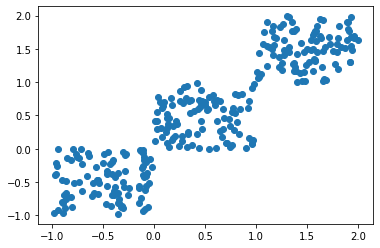

In [2]:
plt.scatter(input[:,0],input[:,1])

In [3]:
k=3
seed=np.random.rand(k,2)


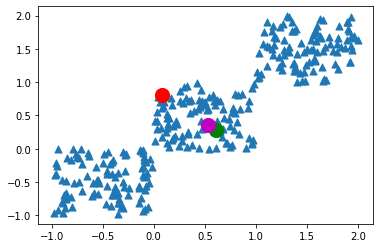

In [4]:
plt.scatter(input[:,0],input[:,1],s=50,marker='^')
plt.scatter(seed[0,0],seed[0,1], s=200,marker='o',color='r')
plt.scatter(seed[1,0],seed[1,1],s=200, marker='o',color='g')
plt.scatter(seed[2,0],seed[2,1],s=200, marker='o',color='m')
plt.show()

In [5]:
dist=np.zeros((len(input),k))
seedNew=seed
numIter=100

for j in range(numIter):
    for i in range(k):
        dist[:,i]=np.sqrt(np.sum((input-seedNew[i,:])**2,axis=1))

    index = np.argmin(dist, axis=1)
    for i in range(k):
        seedNew[i,:]=np.mean(input[index==i,:],axis=0)


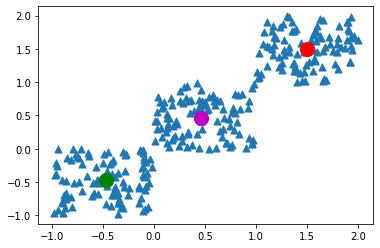

In [6]:
plt.scatter(input[:,0],input[:,1],s=50,marker='^')
plt.scatter(seedNew[0,0],seedNew[0,1], s=200,marker='o',color='r')
plt.scatter(seedNew[1,0],seedNew[1,1],s=200, marker='o',color='g')
plt.scatter(seedNew[2,0],seedNew[2,1],s=200, marker='o',color='m')
plt.show()

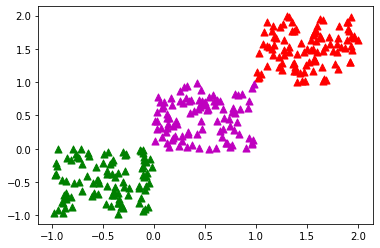

In [7]:
plt.scatter(input[index==0,0],input[index==0,1],s=50,marker='^',color='r')
plt.scatter(input[index==1,0],input[index==1,1],s=50,marker='^',color='g')
plt.scatter(input[index==2,0],input[index==2,1],s=50,marker='^',color='m')
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

#Scaling and Splitting
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#Modelling
from sklearn.cluster import KMeans

df=pd.read_csv('Diamonds Prices2022.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [9]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [10]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


Text(0, 0.5, 'Count')

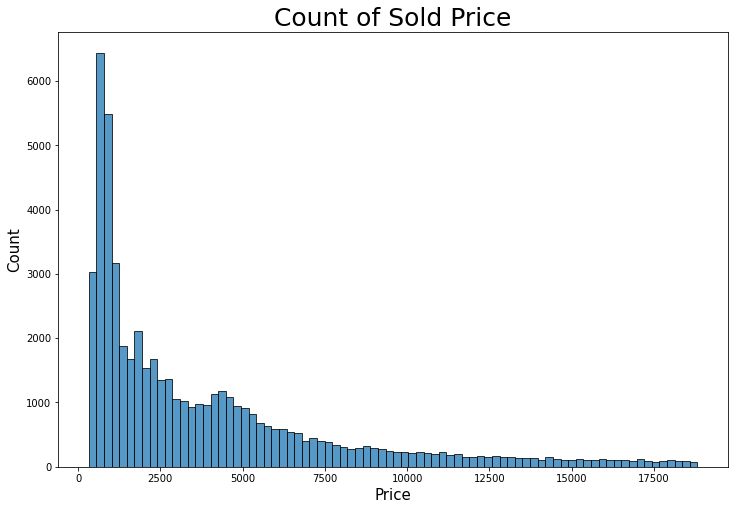

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(x='price',data=df)
plt.title('Count of Sold Price',fontsize=25,fontweight=5)
plt.xlabel('Price',fontsize=15,fontweight=3)
plt.ylabel('Count',fontsize=15,fontweight=3)

In [12]:
df['price'].values

array([ 326,  326,  327, ..., 2756, 2756, 2757], dtype=int64)

In [13]:
df['price'].to_numpy()

array([ 326,  326,  327, ..., 2756, 2756, 2757], dtype=int64)

In [14]:
price_data=df['price'].to_numpy()
mean_price=price_data.mean()
std_price=price_data.std()
normalize_price=(price_data-mean_price)/std_price
k=3
seed=np.random.rand(k,1)*2-1
dist=np.zeros((len(price_data),k))
seedNew=seed
numIter=100

for j in range(numIter):
    for i in range(k):
        dist[:,i]=np.abs(normalize_price-seedNew[i])

    index = np.argmin(dist, axis=1)
    for i in range(k):
        seedNew[i]=np.mean(normalize_price[index==i],axis=0)

Text(0, 0.5, 'Count')

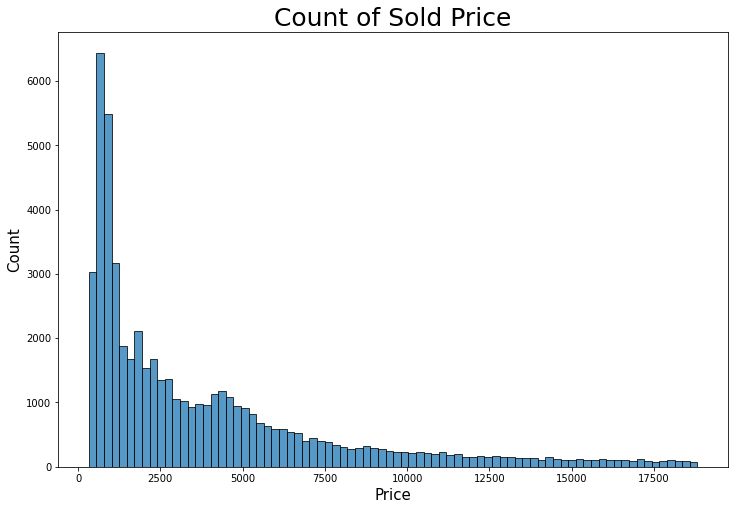

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(price_data)
plt.title('Count of Sold Price',fontsize=25,fontweight=5)
plt.xlabel('Price',fontsize=15,fontweight=3)
plt.ylabel('Count',fontsize=15,fontweight=3)

In [16]:
print(np.sort((seedNew*std_price+mean_price).flatten()))

[ 1458.72365467  5782.14690335 13345.48372833]


In [17]:
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [18]:
df['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53938      Premium
53939        Ideal
53940      Premium
53941      Premium
53942    Very Good
Name: cut, Length: 53943, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [19]:
encoder = LabelEncoder()  #编码
df['cut'] = encoder.fit_transform(df['cut'])  #数据的统一化和标准化
df['color'] = encoder.fit_transform(df['color'])
df['clarity'] = encoder.fit_transform(df['clarity'])

In [20]:
df['cut']

0        2
1        3
2        1
3        3
4        1
        ..
53938    3
53939    2
53940    3
53941    3
53942    4
Name: cut, Length: 53943, dtype: int32

In [21]:
for col in df.columns:
    #calculating Q1 for the feature
    q1 = df[col].quantile(0.25)
    #calculating Q3 for the feature
    q3 = df[col].quantile(0.75)
    
    #Calculating the IQR value
    iqr = q3-q1
    # Calculating min/max value based on IQR
    minn = q1-1.5*iqr
    maxx = q3+1.5*iqr
    
    # Filtering values only in the min-max range
    df = df[(df[col] >= minn) & (df[col] <= maxx)]

In [23]:
X.head(5)

NameError: name 'X' is not defined

In [ ]:
Y.head(5)

,price,x,y,z
0,326,3.95,3.98,2.43
1,326,3.89,3.84,2.31
3,334,4.20,4.23,2.63
4,335,4.34,4.35,2.75
5,336,3.94,3.96,2.48


In [ ]:
X = df.drop(['price','x','y','z'],axis=1)
Y = df.drop(['carat','cut','color','clarity','depth','table'],axis=1)
price=df['price']
scaler = StandardScaler()  #去均值和方差归一化。且是针对每一个特征维度
normalized_x= pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
normalized_y= pd.DataFrame(scaler.fit_transform(Y),columns = Y.columns)

In [ ]:
normalized_x

,carat,cut,color,clarity,depth,table
0,-1.290959,-0.694162,-0.909865,-0.515013,-0.250934,-1.114509
1,-1.346205,0.386999,-0.909865,-1.093821,-1.812192,1.856672
2,-1.125223,0.386999,1.464220,0.642602,0.575614,0.371081
3,-1.069978,-1.775322,2.057741,-0.515013,1.402163,0.371081
4,-1.263337,1.468159,2.057741,1.800217,0.942969,-0.124115
...,...,...,...,...,...,...
46594,0.449270,0.386999,0.870699,-0.515013,-0.710127,0.371081
46595,0.145421,-0.694162,-1.503386,-0.515013,0.391937,-1.114509
46596,0.034930,0.386999,-0.909865,-1.093821,-1.169321,-1.114509
46597,0.034930,0.386999,-0.316343,-1.093821,-1.812192,2.351869


In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca',perplexity=100).fit_transform(normalized_x.iloc[:])
X_embedded.shape

/Users/yimingqian/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(46599, 2)

/Users/yimingqian/.pyenv/versions/3.8.6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

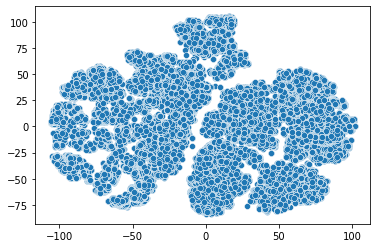

In [ ]:
sns.scatterplot(X_embedded[:,0],X_embedded[:,1])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_x)
x_kmeans =kmeans.predict(normalized_x)

<AxesSubplot:ylabel='Count'>

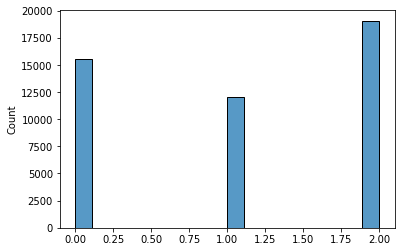

In [ ]:
sns.histplot(x_kmeans)

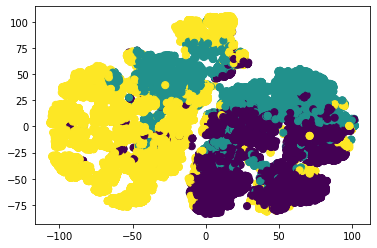

In [ ]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=x_kmeans, s=50, cmap='viridis')

In [ ]:
print(X.iloc[x_kmeans==0].mean())
print(price.iloc[x_kmeans==0].mean())
print(len(X.iloc[x_kmeans==0]))

carat       0.582525
cut         3.449030
color       1.961700
clarity     4.021020
depth      61.369289
table      58.627668
dtype: float64
2286.589464182088
15509


In [ ]:
print(X.iloc[x_kmeans==1].mean())
print(price.iloc[x_kmeans==1].mean())
print(len(X.iloc[x_kmeans==1]))

carat       1.131256
cut         2.709106
color       3.919168
clarity     3.181954
depth      62.005430
table      57.701713
dtype: float64
5613.164573804574
12025


In [ ]:
print(X.iloc[x_kmeans==2].mean())
print(price.iloc[x_kmeans==2].mean())
print(len(X.iloc[x_kmeans==2]))

carat       0.517089
cut         1.943299
color       2.123420
clarity     4.229478
depth      61.955379
table      55.845943
dtype: float64
1928.6226593233673
19065


In [ ]:
Y_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca',perplexity=50).fit_transform(normalized_y)
Y_embedded.shape

/Users/yimingqian/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(46599, 2)

/Users/yimingqian/.pyenv/versions/3.8.6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

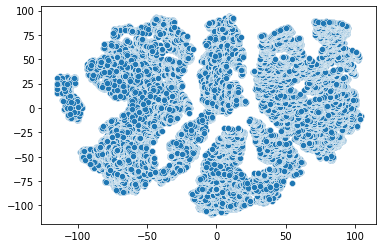

In [ ]:
sns.scatterplot(Y_embedded[:,0],Y_embedded[:,1])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_y)
y_kmeans =kmeans.predict(normalized_y)

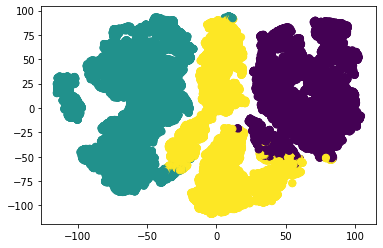

In [ ]:
plt.scatter(Y_embedded[:,0],Y_embedded[:,1], c=y_kmeans, s=50, cmap='viridis')

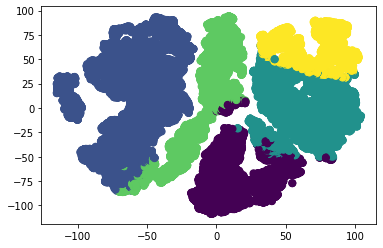

In [ ]:
plt.scatter(Y_embedded[:,0],Y_embedded[:,1], c=y_kmeans, s=50, cmap='viridis')

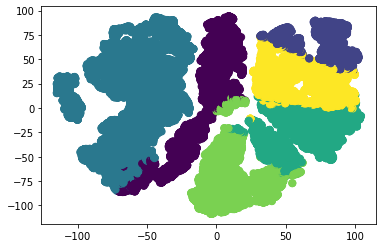

In [ ]:
plt.scatter(Y_embedded[:,0],Y_embedded[:,1], c=y_kmeans, s=50, cmap='viridis')

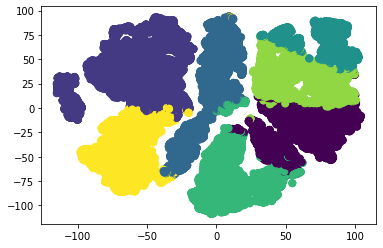

In [ ]:
plt.scatter(Y_embedded[:,0],Y_embedded[:,1], c=y_kmeans, s=50, cmap='viridis')

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(normalized_y)
y_kmeans =kmeans.predict(normalized_y)

In [ ]:
for i in range(3):
    print(price.iloc[y_kmeans==i].mean())
    print(len(Y.iloc[y_kmeans==i]))

6226.364879356568
14920
789.3670665971135
17253
2302.363579647858
14426


In [ ]:
for i in range(5):
    print(price.iloc[y_kmeans==i].mean())
    print(len(Y.iloc[y_kmeans==i]))

2887.4182899064003
7906
768.532962962963
16200
5226.234027981606
10221
1621.0955397871262
7892
8730.827397260275
4380


In [ ]:
for i in range(6):
    print(price.iloc[y_kmeans==i].mean())
    print(len(Y.iloc[y_kmeans==i]))

1602.4809414172423
7818
9118.897870924817
3006
767.2386624480426
16119
4390.99766835825
7291
2740.5833455290503
6833
6630.9323933477945
5532


In [ ]:
for i in range(7):
    print(price.iloc[y_kmeans==i].mean())
    print(len(Y.iloc[y_kmeans==i]))

4428.708377801494
7496
690.6223802750119
10545
1687.1409887898822
6958
9112.914827586206
2900
2753.110110701107
6775
6750.295277054667
5378
936.0029020925615
6547


In [ ]:
for i in range(7):
    print(price.iloc[y_kmeans==i].mean())
    print(price.iloc[y_kmeans==i].sum()/1000000)
    print(len(price.iloc[y_kmeans==i]))

4428.708377801494
33.197598
690.6223802750119
7.282613
1687.1409887898822
11.739127
9112.914827586206
26.427453
2753.110110701107
18.652321
6750.295277054667
36.303088
936.0029020925615
6.128011


In [ ]:
print(Y.iloc[y_kmeans==0].mean())
print(price.iloc[y_kmeans==0].mean())
print(len(Y.iloc[y_kmeans==0]))

price    6226.364879
x           6.691247
y           6.688507
z           4.133962
dtype: float64
6226.364879356568
14920


In [ ]:
print(Y.iloc[y_kmeans==0].mean())
print(price.iloc[y_kmeans==0].mean())
print(len(Y.iloc[y_kmeans==0]))

price    4428.708378
x           6.407086
y           6.405111
z           3.965463
dtype: float64
4428.708377801494
7496


In [ ]:
print(Y.iloc[y_kmeans==1].mean())
print(price.iloc[y_kmeans==1].mean())
print(len(Y.iloc[y_kmeans==1]))

price    789.367067
x          4.492196
y          4.501847
z          2.776086
dtype: float64
789.3670665971135
17253


In [ ]:
print(Y.iloc[y_kmeans==1].mean())
print(price.iloc[y_kmeans==1].mean())
print(len(Y.iloc[y_kmeans==1]))

price    690.622380
x          4.335781
y          4.345971
z          2.680762
dtype: float64
690.6223802750119
10545


In [ ]:
print(Y.iloc[y_kmeans==2].mean())
print(price.iloc[y_kmeans==2].mean())
print(len(Y.iloc[y_kmeans==2]))

price    2302.363580
x           5.540640
y           5.549066
z           3.425211
dtype: float64
2302.363579647858
14426


In [ ]:
for i in range(7):
    print(Y.iloc[y_kmeans==i].mean())


price    4428.708378
x           6.407086
y           6.405111
z           3.965463
dtype: float64
price    690.622380
x          4.335781
y          4.345971
z          2.680762
dtype: float64
price    1687.140989
x           5.220907
y           5.229142
z           3.222634
dtype: float64
price    9112.914828
x           7.274897
y           7.270286
z           4.491586
dtype: float64
price    2753.110111
x           5.779191
y           5.788195
z           3.574748
dtype: float64
price    6750.295277
x           6.686975
y           6.685229
z           4.127363
dtype: float64
price    936.002902
x          4.731535
y          4.740550
z          2.921691
dtype: float64


In [ ]:
df.corr() 

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.071608,0.260229,-0.224319,0.033137,0.188199,0.925553,0.986571,0.985740,0.985419
cut,0.071608,1.000000,0.009052,-0.016322,-0.145412,0.316587,0.055627,0.071532,0.072962,0.057221
color,0.260229,0.009052,1.000000,-0.015979,0.047052,0.017523,0.146353,0.236540,0.236708,0.240221
clarity,-0.224319,-0.016322,-0.015979,1.000000,-0.041431,-0.081455,-0.077157,-0.231707,-0.229541,-0.233595
depth,0.033137,-0.145412,0.047052,-0.041431,1.000000,-0.248616,0.009301,-0.014240,-0.015163,0.088677
table,0.188199,0.316587,0.017523,-0.081455,-0.248616,1.000000,0.139472,0.186726,0.181297,0.158817
price,0.925553,0.055627,0.146353,-0.077157,0.009301,0.139472,1.000000,0.904463,0.905418,0.901790
x,0.986571,0.071532,0.236540,-0.231707,-0.014240,0.186726,0.904463,1.000000,0.998512,0.993339
y,0.985740,0.072962,0.236708,-0.229541,-0.015163,0.181297,0.905418,0.998512,1.000000,0.993246
z,0.985419,0.057221,0.240221,-0.233595,0.088677,0.158817,0.901790,0.993339,0.993246,1.000000


In [ ]:
Z = df.drop(['price','cut','clarity','depth'],axis=1)
normalized_z= pd.DataFrame(scaler.fit_transform(Z),columns = Z.columns)